# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/ml-mipt/ml-mipt/basic_s20/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [7]:
X_train_pd = pd.DataFrame(X_train)
X_test_pd = pd.DataFrame(X_test)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,771,97,48,105,212,64,11,201,33,23,155,212,602,162,64,2,7,193,202
1,426,106,53,98,203,63,11,220,30,25,167,228,710,214,71,10,24,188,197
2,697,92,37,75,184,70,6,154,42,19,131,184,363,127,71,0,4,198,202
3,805,81,43,68,148,64,7,150,45,19,144,175,330,171,80,1,2,182,185
4,424,91,41,93,197,65,9,183,36,21,137,202,504,153,66,11,24,193,200
5,378,82,36,54,117,53,7,125,54,18,126,146,229,128,78,1,5,180,184
6,57,89,47,84,133,55,11,157,44,20,160,169,354,176,74,5,9,182,192
7,205,87,47,81,149,62,9,147,45,19,152,171,325,181,72,0,6,188,198
8,334,107,57,102,184,55,7,234,28,26,171,243,822,229,77,7,11,187,187
9,32,93,35,66,154,59,6,142,46,18,128,162,304,120,64,5,13,197,202


Methods `describe` and `info` deliver some useful information.

In [8]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,416.684882,93.666667,44.954463,82.586521,168.442623,61.198543,8.455373,170.034608,40.681239,20.677596,148.153005,189.433515,445.735883,175.256831,72.479053,6.444444,13.448087,188.805100,195.533698
std,239.986817,8.398166,6.188030,16.000293,32.749476,6.970920,4.022327,33.332880,7.818332,2.611015,14.608713,31.141097,177.595305,32.388573,7.080998,5.116089,9.070664,6.203682,7.600018
min,0.000000,73.000000,33.000000,40.000000,105.000000,47.000000,3.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,213.000000,87.000000,40.000000,70.000000,141.000000,56.000000,7.000000,148.000000,33.000000,19.000000,137.000000,168.000000,321.000000,151.000000,67.000000,2.000000,6.000000,184.000000,190.000000
50%,415.000000,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,367.000000,174.000000,72.000000,5.000000,12.000000,188.000000,197.000000
75%,612.000000,100.000000,50.000000,98.000000,195.000000,65.000000,10.000000,201.000000,46.000000,23.000000,160.000000,217.000000,602.000000,199.000000,76.000000,10.000000,20.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,112.000000,322.000000,133.000000,55.000000,265.000000,61.000000,29.000000,188.000000,287.000000,1018.000000,264.000000,127.000000,22.000000,41.000000,206.000000,211.000000


In [9]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
0     549 non-null int32
1     549 non-null int32
2     549 non-null int32
3     549 non-null int32
4     549 non-null int32
5     549 non-null int32
6     549 non-null int32
7     549 non-null int32
8     549 non-null int32
9     549 non-null int32
10    549 non-null int32
11    549 non-null int32
12    549 non-null int32
13    549 non-null int32
14    549 non-null int32
15    549 non-null int32
16    549 non-null int32
17    549 non-null int32
18    549 non-null int32
dtypes: int32(19)
memory usage: 40.8 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [10]:
### YOUR CODE HERE
X_test_pd = (X_test_pd - X_train_pd.mean()) / (X_train_pd.max() - X_train_pd.min())
X_train_pd = (X_train_pd - X_train_pd.mean()) / (X_train_pd.max() - X_train_pd.min())
X_train_pd.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.419308,0.072464,0.117136,0.311298,0.200725,0.032575,0.048935,0.202388,-0.219464,0.193534,0.097814,0.143736,0.187367,-0.087216,-0.124692,-0.202020,-0.157270,0.139830,0.215543
1,0.011024,0.268116,0.309444,0.214076,0.159251,0.020947,0.048935,0.326571,-0.305178,0.360200,0.269243,0.245646,0.316863,0.254889,-0.021751,0.161616,0.257364,-0.026837,0.048877
2,0.331734,-0.036232,-0.305941,-0.105368,0.071693,0.102343,-0.047219,-0.104801,0.037679,-0.139800,-0.245043,-0.034608,-0.099204,-0.317479,-0.021751,-0.292929,-0.230441,0.306497,0.215543
3,0.459545,-0.275362,-0.075172,-0.202591,-0.094206,0.032575,-0.027988,-0.130945,0.123393,-0.139800,-0.059329,-0.091933,-0.138772,-0.028005,0.110602,-0.247475,-0.279222,-0.226837,-0.351123
4,0.008657,-0.057971,-0.152095,0.144632,0.131601,0.044203,0.010474,0.084741,-0.133750,0.026867,-0.159329,0.080041,0.069861,-0.146427,-0.095280,0.207071,0.257364,0.139830,0.148877


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [11]:
### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve

for c in [0.001,0.01,0.1,1,10,20,30,50,100,500,1000]:
    for l in ['l1','l2'] :
        clf = LogisticRegression(penalty=l,C=c)
        scores = cross_val_score(clf,X_train_pd,y_train,cv=5,scoring='f1_macro')
        
        print("C=%s %s f1=%.4f" % (c,l,scores.mean()))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\c

C=0.001 l1 f1=0.1056
C=0.001 l2 f1=0.3783
C=0.01 l1 f1=0.1056
C=0.01 l2 f1=0.4171
C=0.1 l1 f1=0.4211
C=0.1 l2 f1=0.5193
C=1 l1 f1=0.7247
C=1 l2 f1=0.6623
C=10 l1 f1=0.8092
C=10 l2 f1=0.7580
C=20 l1 f1=0.8073
C=20 l2 f1=0.7709
C=30 l1 f1=0.8054
C=30 l2 f1=0.7756
C=50 l1 f1=0.8003
C=50 l2 f1=0.7806
C=100 l1 f1=0.8067
C=100 l2 f1=0.7934
C=500 l1 f1=0.8045
C=500 l2 f1=0.7993
C=1000 l1 f1=0.8008
C=1000 l2 f1=0.7989


In [12]:
clf = LogisticRegression(penalty='l1',C=30)
scores_f1 = cross_val_score(clf,X_train_pd,y_train,cv=5,scoring='f1_macro')
scores_acc = cross_val_score(clf,X_train_pd,y_train,cv=5,scoring='accuracy')
clf.fit(X_train_pd,y_train)


print("f1  = %.4f" % (scores.mean()))
print("acc = %.4f" % (scores_acc.mean()))

f1  = 0.7989
acc = 0.8033


In [ ]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [13]:
### YOUR CODE HERE
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

pca = PCA()
pca.fit_transform(X_train_pd)


evr = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(16,9))
plt.title("explained_variance_ratio_")
plt.plot(range(1,len(evr)+1),evr)
plt.grid(True)
plt.xticks(range(1,len(evr)+1))
plt.show()

<Figure size 1600x900 with 1 Axes>

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [14]:
### YOUR CODE HERE
pca = PCA(5)
X_train_pca = pca.fit_transform(X_train_pd)
X_test_pca = pca.transform(X_test_pd)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [15]:
### YOUR CODE HERE

for c in [0.001,0.01,0.1,1,10,20,30,50,100,500,1000]:
    for l in ['l1','l2'] :
        clf = LogisticRegression(penalty=l,C=c)
        scores = cross_val_score(clf,X_train_pca,y_train,cv=5,scoring='f1_macro')
        
        print("C=%s %s f1=%.4f" % (c,l,scores.mean()))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\c

C=0.001 l1 f1=0.1056
C=0.001 l2 f1=0.3602
C=0.01 l1 f1=0.1056
C=0.01 l2 f1=0.3914
C=0.1 l1 f1=0.3960
C=0.1 l2 f1=0.4238
C=1 l1 f1=0.4441
C=1 l2 f1=0.4367
C=10 l1 f1=0.4336
C=10 l2 f1=0.4358
C=20 l1 f1=0.4346
C=20 l2 f1=0.4343
C=30 l1 f1=0.4346
C=30 l2 f1=0.4346
C=50 l1 f1=0.4346
C=50 l2 f1=0.4346
C=100 l1 f1=0.4346
C=100 l2 f1=0.4346
C=500 l1 f1=0.4346
C=500 l2 f1=0.4346
C=1000 l1 f1=0.4346
C=1000 l2 f1=0.4346


#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [16]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE
for depth in range(1,100) : 
    clf = DecisionTreeClassifier(max_depth=depth)
    f1 = cross_val_score(clf,X_train,y_train,scoring='f1_macro').mean()
    
    print('Depth %s \t %.4f' % (depth,f1))

    
for depth in range(1,100) : 
    clf = DecisionTreeClassifier(max_depth=depth)
    f1 = cross_val_score(clf,X_train_pd,y_train,scoring='f1_macro').mean()
    
    print('Depth %s \t %.4f' % (depth,f1))
    
    
for depth in range(1,100) : 
    clf = DecisionTreeClassifier(max_depth=depth)
    f1 = cross_val_score(clf,X_train_pca,y_train,scoring='f1_macro').mean()
    
    print('Depth %s \t %.4f' % (depth,f1))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\c

Depth 1 	 0.2832
Depth 2 	 0.5253
Depth 3 	 0.5962
Depth 4 	 0.6375
Depth 5 	 0.6696
Depth 6 	 0.6751
Depth 7 	 0.6688
Depth 8 	 0.6535
Depth 9 	 0.6550
Depth 10 	 0.6565
Depth 11 	 0.6725
Depth 12 	 0.6794
Depth 13 	 0.6623
Depth 14 	 0.6601
Depth 15 	 0.6407
Depth 16 	 0.6538
Depth 17 	 0.6791
Depth 18 	 0.6755
Depth 19 	 0.6696
Depth 20 	 0.6608
Depth 21 	 0.6576
Depth 22 	 0.6674
Depth 23 	 0.6462
Depth 24 	 0.6611
Depth 25 	 0.6679
Depth 26 	 0.6518
Depth 27 	 0.6655
Depth 28 	 0.6617
Depth 29 	 0.6530
Depth 30 	 0.6717
Depth 31 	 0.6580
Depth 32 	 0.6578
Depth 33 	 0.6655
Depth 34 	 0.6711
Depth 35 	 0.6789
Depth 36 	 0.6526
Depth 37 	 0.6723
Depth 38 	 0.6570
Depth 39 	 0.6586
Depth 40 	 0.6641
Depth 41 	 0.6633
Depth 42 	 0.6648
Depth 43 	 0.6717
Depth 44 	 0.6625
Depth 45 	 0.6637
Depth 46 	 0.6721
Depth 47 	 0.6587
Depth 48 	 0.6564
Depth 49 	 0.6657
Depth 50 	 0.6634
Depth 51 	 0.6652
Depth 52 	 0.6589
Depth 53 	 0.6604
Depth 54 	 0.6459
Depth 55 	 0.6673
Depth 56 	 0.6630
D

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\c

Depth 1 	 0.2832
Depth 2 	 0.5253
Depth 3 	 0.5953
Depth 4 	 0.6354
Depth 5 	 0.6744
Depth 6 	 0.6729
Depth 7 	 0.6615
Depth 8 	 0.6638
Depth 9 	 0.6719
Depth 10 	 0.6556
Depth 11 	 0.6596
Depth 12 	 0.6662
Depth 13 	 0.6696
Depth 14 	 0.6712
Depth 15 	 0.6628
Depth 16 	 0.6462
Depth 17 	 0.6786
Depth 18 	 0.6638
Depth 19 	 0.6720
Depth 20 	 0.6684
Depth 21 	 0.6814
Depth 22 	 0.6707
Depth 23 	 0.6753
Depth 24 	 0.6828
Depth 25 	 0.6724
Depth 26 	 0.6583
Depth 27 	 0.6700
Depth 28 	 0.6651
Depth 29 	 0.6424
Depth 30 	 0.6569
Depth 31 	 0.6653
Depth 32 	 0.6751
Depth 33 	 0.6612
Depth 34 	 0.6764
Depth 35 	 0.6686
Depth 36 	 0.6660
Depth 37 	 0.6469
Depth 38 	 0.6459
Depth 39 	 0.6627
Depth 40 	 0.6668
Depth 41 	 0.6710
Depth 42 	 0.6707
Depth 43 	 0.6734
Depth 44 	 0.6438
Depth 45 	 0.6628
Depth 46 	 0.6791
Depth 47 	 0.6661
Depth 48 	 0.6571
Depth 49 	 0.6721
Depth 50 	 0.6814
Depth 51 	 0.6601
Depth 52 	 0.6611
Depth 53 	 0.6688
Depth 54 	 0.6573
Depth 55 	 0.6773
Depth 56 	 0.6660
D

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\c

Depth 15 	 0.5256
Depth 16 	 0.5183
Depth 17 	 0.5120
Depth 18 	 0.5187
Depth 19 	 0.5400
Depth 20 	 0.5288
Depth 21 	 0.5241
Depth 22 	 0.5425
Depth 23 	 0.5398
Depth 24 	 0.5257
Depth 25 	 0.5255
Depth 26 	 0.5333
Depth 27 	 0.5335
Depth 28 	 0.5164
Depth 29 	 0.5162
Depth 30 	 0.5360
Depth 31 	 0.5368
Depth 32 	 0.5304
Depth 33 	 0.5403
Depth 34 	 0.5334
Depth 35 	 0.5118
Depth 36 	 0.5427
Depth 37 	 0.5283
Depth 38 	 0.5384
Depth 39 	 0.5101
Depth 40 	 0.5227
Depth 41 	 0.5180
Depth 42 	 0.5369
Depth 43 	 0.5348
Depth 44 	 0.5441
Depth 45 	 0.5317
Depth 46 	 0.5361
Depth 47 	 0.5282
Depth 48 	 0.5366
Depth 49 	 0.5123
Depth 50 	 0.5324
Depth 51 	 0.5325
Depth 52 	 0.5238
Depth 53 	 0.5310
Depth 54 	 0.5470
Depth 55 	 0.5392
Depth 56 	 0.5194
Depth 57 	 0.5327
Depth 58 	 0.5287
Depth 59 	 0.5413
Depth 60 	 0.5401
Depth 61 	 0.5293
Depth 62 	 0.5340
Depth 63 	 0.5393
Depth 64 	 0.5201
Depth 65 	 0.5294
Depth 66 	 0.5365
Depth 67 	 0.5313
Depth 68 	 0.5360
Depth 69 	 0.5354
Depth 70 	

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [ ]:
# YOUR CODE HERE

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [17]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE
# YOUR CODE HERE
score_list = []
for n_est in range(1,51) :
    clf = RandomForestClassifier(n_estimators=n_est,max_depth=8)
    f1 = cross_val_score(clf,X_train_pd,y_train,scoring='f1_macro').mean()
    score_list.append(f1)
    
print(np.max(score_list))
print('Best number of estimator = %s \t f1 = %.4f' % (np.argmax(score_list)+1,np.max(score_list)))

0.7320672075916717
Best number of estimator = 35 	 f1 = 0.7321


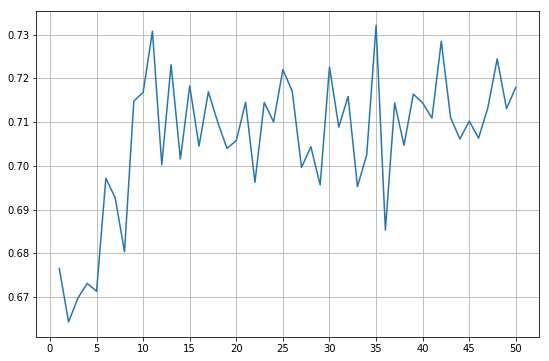

In [18]:
plt.figure(figsize=(9,6))
plt.plot(range(1,51),score_list)
plt.grid(True)
plt.xticks(range(0,51,5))
plt.show()

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [19]:
# YOUR CODE HERE
from sklearn.metrics import f1_score

f1_score_list = []
data_boundary_list = np.linspace(0,X_train_pd.shape[0],num=11,dtype=int)[1:]
for data_boundary in data_boundary_list :
    x_train_i = X_train_pd.values[:data_boundary,:]
    y_train_i = y_train[:data_boundary]

    lr = LogisticRegression(penalty='l1',C=30).fit(x_train_i,y_train_i)
    dt = DecisionTreeClassifier(max_depth=8).fit(x_train_i,y_train_i)
    rf = RandomForestClassifier(n_estimators=49,max_depth=8).fit(x_train_i,y_train_i)

    f1_score_list.append([
        f1_score(y_train_i,lr.predict(x_train_i),average='macro'),
        f1_score(y_train_i,dt.predict(x_train_i),average='macro'),
        f1_score(y_train_i,rf.predict(x_train_i),average='macro'),
        f1_score(y_test,lr.predict(X_test_pd),average='macro'),
        f1_score(y_test,dt.predict(X_test_pd),average='macro'),
        f1_score(y_test,rf.predict(X_test_pd),average='macro')
        
    ])
f1_score_list = np.array(f1_score_list)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


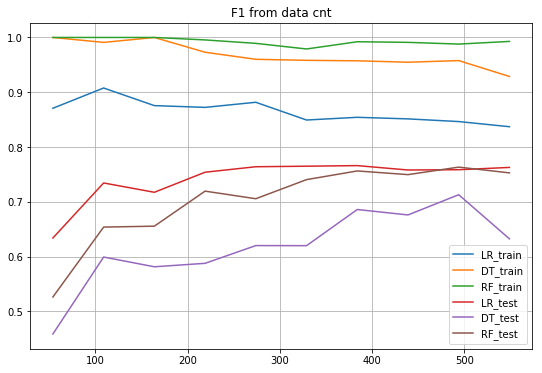

In [20]:
plt.figure(figsize=(9,6))
plt.title('F1 from data cnt')
plt.grid(True)

ax = plt.subplot(111)
for i,legend in enumerate(['LR_train','DT_train','RF_train','LR_test','DT_test','RF_test']) :
    ax.plot(data_boundary_list, f1_score_list[:,i], label=legend)

plt.legend()
plt.show()